# Heart Attack Prediction

Training different models like Logistic Regression,Random Forest,XGBoost and Neural Networks to select the best suited model.

#### 1. Importing all the necessary libraries and modules:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

#### 2. Reading the dataset and analysing it:

In [2]:
df=pd.read_csv('Dataset/HAC.csv')

In [3]:
df

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,62,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,96,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [5]:
df.describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.190296,0.659591,78.338135,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.646558,0.474027,51.630760,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [6]:
df.isnull().sum()

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

In [7]:
df.isna().sum()

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df['class']=df['class'].map({'negative':0,'positive':1})

In [10]:
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,62,1,66,160,83,160.0,1.80,0.012,0
1,21,1,96,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0


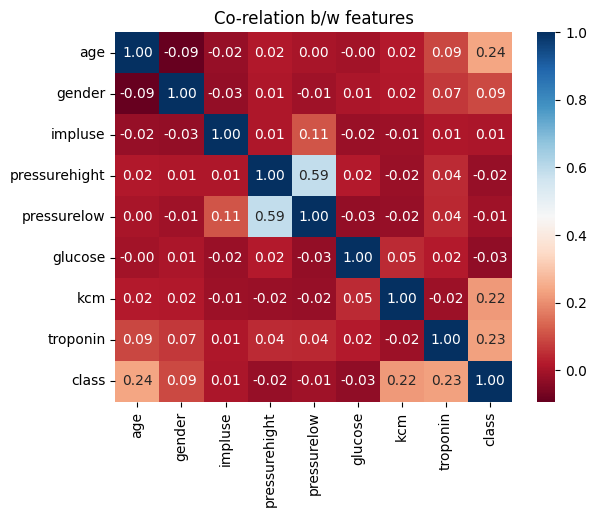

In [11]:
sns.heatmap(data=df.corr(),annot=True,cmap='RdBu',fmt='.2f')
plt.title('Co-relation b/w features')
plt.show()

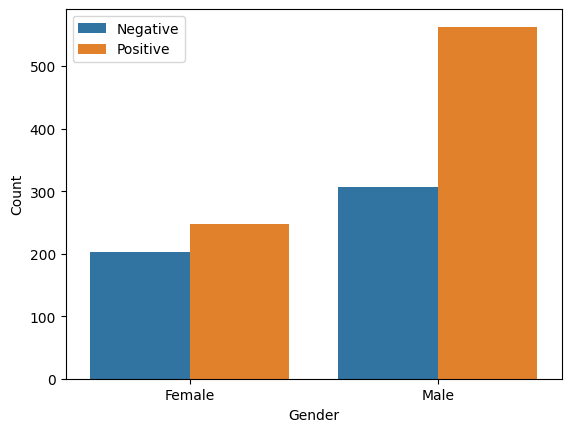

In [12]:
sns.countplot(x=df['gender'],hue=df['class'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0,1],labels=['Female','Male'])
plt.legend(['Negative','Positive'])
plt.show()

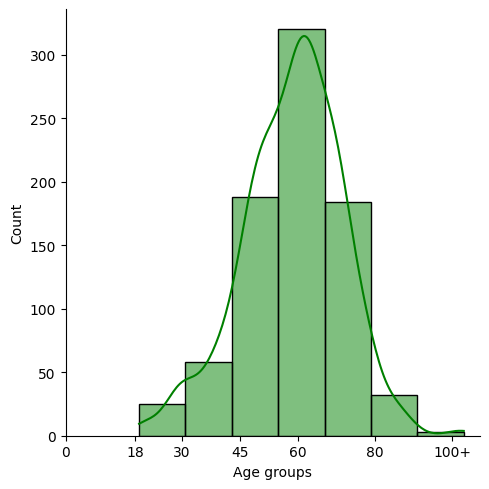

In [13]:
df_pos=df[df['class']==1]
sns.displot(df_pos['age'],kde=True,bins=7,color='green')
plt.xticks(ticks=[0,18,30,45,60,80,100],labels=['0','18','30','45','60','80','100+'])
plt.xlabel('Age groups')
plt.show()

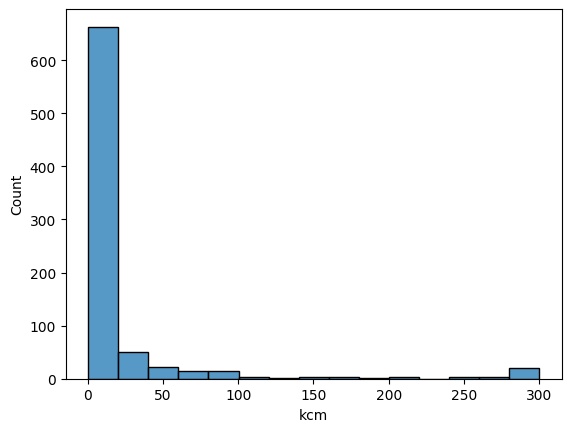

In [14]:
sns.histplot(df_pos['kcm'],kde=False,bins=15)
plt.show()

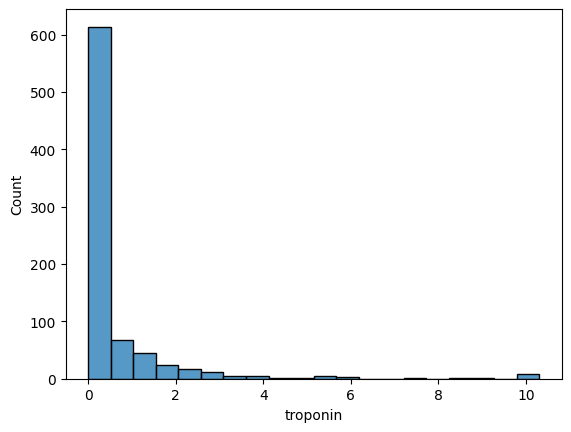

In [15]:
sns.histplot(df_pos['troponin'],bins=20)
plt.show()

In [16]:
X=df.drop(columns=['class'])
Y=df['class']

#### 3. Performing scaling and creating training set and test set:

In [17]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [18]:
scalar=StandardScaler()
X_train_scaled=scalar.fit_transform(X_train)
X_test_scaled=scalar.transform(X_test)

#### 4. Training models
##### a) Logistic Regression:

In [19]:
model1=LogisticRegression()
model1.fit(X_train_scaled,Y_train)

LogisticRegression()

In [20]:
accuracy1=accuracy_score(Y_test,model1.predict(X_test_scaled))

##### b) Random Forest:

In [21]:
Min_samples_split=[2,10, 30, 50, 100, 200, 300, 700] 
N_estimators=[2,4,8,16,32,64,128]
Max_depth= [2, 4, 8, 16, 32, 64, None]

In [22]:
accuracy_train=[]
accuracy_test=[]
for min_samples in Min_samples_split:
    model2=RandomForestClassifier(min_samples_split=min_samples).fit(X_train_scaled,Y_train)
    accuracy_train.append(accuracy_score(Y_train,model2.predict(X_train_scaled)))
    accuracy_test.append(accuracy_score(Y_test,model2.predict(X_test_scaled)))    

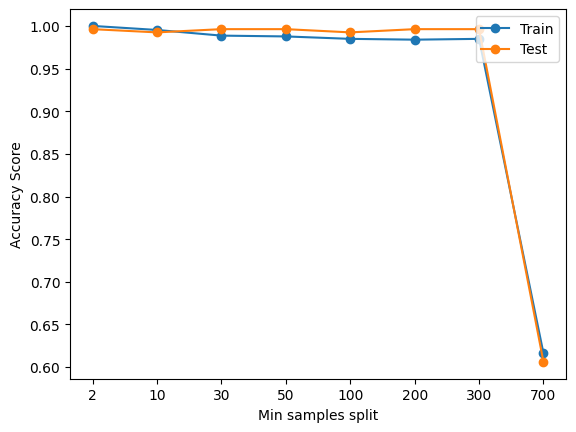

In [23]:
plt.plot(accuracy_train,marker='o')
plt.plot(accuracy_test,marker='o')
plt.xticks(ticks=range(len(Min_samples_split)),labels=Min_samples_split)
plt.xlabel('Min samples split')
plt.ylabel('Accuracy Score')
plt.legend(labels=['Train','Test'],loc='upper right')
plt.show()

In [24]:
accuracy_train=[]
accuracy_test=[]
for n_est in N_estimators:
    model2=RandomForestClassifier(n_estimators=n_est).fit(X_train_scaled,Y_train)
    accuracy_train.append(accuracy_score(Y_train,model2.predict(X_train_scaled)))
    accuracy_test.append(accuracy_score(Y_test,model2.predict(X_test_scaled)))

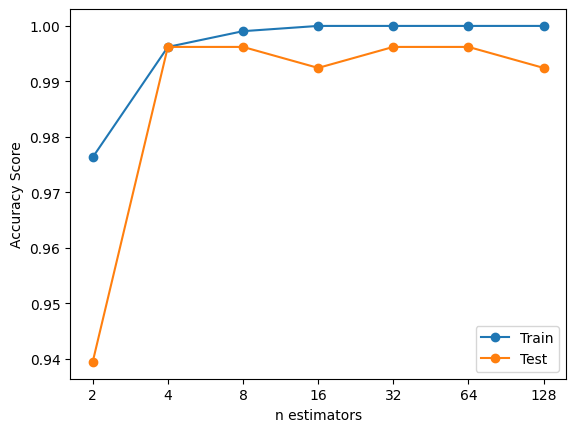

In [25]:
plt.plot(accuracy_train,marker='o')
plt.plot(accuracy_test,marker='o')
plt.xticks(ticks=range(len(N_estimators)),labels=N_estimators)
plt.xlabel('n estimators')
plt.ylabel('Accuracy Score')
plt.legend(labels=['Train','Test'],loc='lower right')
plt.show()

In [26]:
accuracy_train=[]
accuracy_test=[]
for md in Max_depth:   
    model2=RandomForestClassifier(max_depth=md).fit(X_train_scaled,Y_train)
    accuracy_train.append(accuracy_score(Y_train,model2.predict(X_train_scaled)))
    accuracy_test.append(accuracy_score(Y_test,model2.predict(X_test_scaled)))

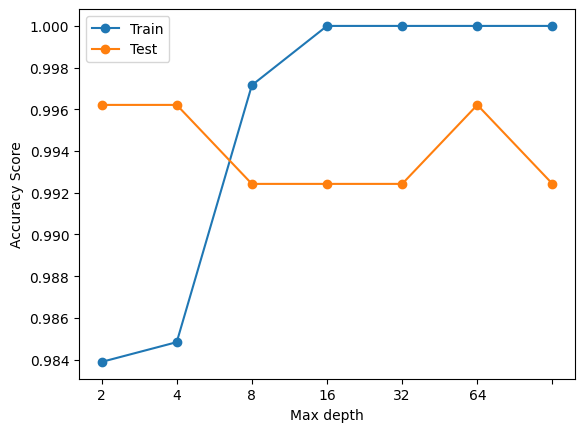

In [27]:
plt.plot(accuracy_train,marker='o')
plt.plot(accuracy_test,marker='o')
plt.xticks(ticks=range(len(Max_depth)),labels=Max_depth)
plt.xlabel('Max depth')
plt.ylabel('Accuracy Score')
plt.legend(labels=['Train','Test'],loc='upper left')
plt.show()

In [28]:
model2=RandomForestClassifier(min_samples_split=30,n_estimators=8,max_depth=4)
model2.fit(X_train_scaled,Y_train)

RandomForestClassifier(max_depth=4, min_samples_split=30, n_estimators=8)

In [29]:
accuracy2=accuracy_score(Y_test,model2.predict(X_test_scaled))

##### c) XGBoost:

In [30]:
accuracy_train=[]
accuracy_test=[]
for n_est in N_estimators:
    model3=XGBClassifier(n_estimators=n_est).fit(X_train_scaled,Y_train)
    accuracy_train.append(accuracy_score(Y_train,model3.predict(X_train_scaled)))
    accuracy_test.append(accuracy_score(Y_test,model3.predict(X_test_scaled)))

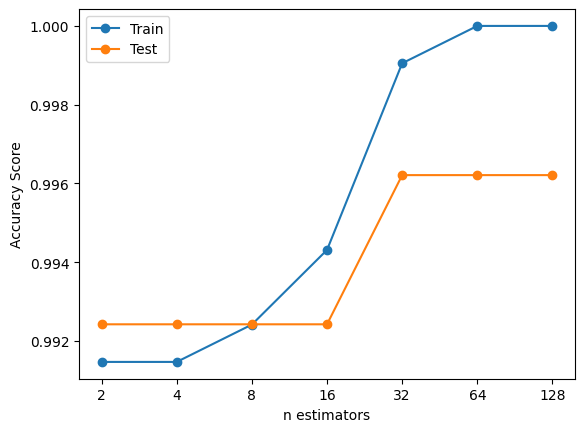

In [31]:
plt.plot(accuracy_train,marker='o')
plt.plot(accuracy_test,marker='o')
plt.xticks(ticks=range(len(N_estimators)),labels=N_estimators)
plt.xlabel('n estimators')
plt.ylabel('Accuracy Score')
plt.legend(labels=['Train','Test'],loc='upper left')
plt.show()

In [32]:
accuracy_train=[]
accuracy_test=[]
for md in Max_depth:
    model3=XGBClassifier(max_depth=md).fit(X_train_scaled,Y_train)
    accuracy_train.append(accuracy_score(Y_train,model3.predict(X_train_scaled)))
    accuracy_test.append(accuracy_score(Y_test,model3.predict(X_test_scaled)))

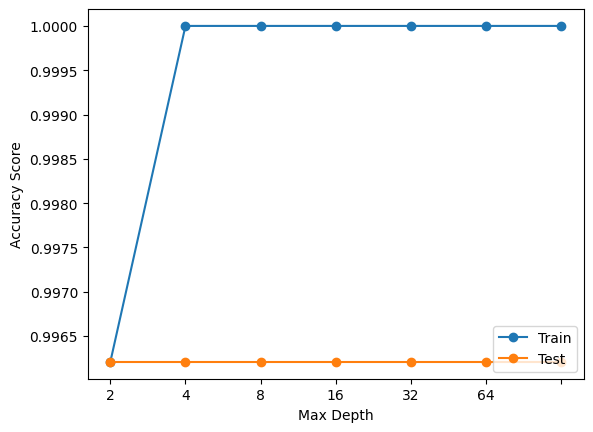

In [33]:
plt.plot(accuracy_train,marker='o')
plt.plot(accuracy_test,marker='o')
plt.xticks(ticks=range(len(Max_depth)),labels=Max_depth)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.legend(labels=['Train','Test'],loc='lower right')
plt.show()

In [34]:
Learning_rate=[0.001,0.003,0.009,0.01,0.03,0.09,None]
accuracy_train=[]
accuracy_test=[]
for l in Learning_rate:
    model3=XGBClassifier(learning_rate=l).fit(X_train_scaled,Y_train)
    accuracy_train.append(accuracy_score(Y_train,model3.predict(X_train_scaled)))
    accuracy_test.append(accuracy_score(Y_test,model3.predict(X_test_scaled)))

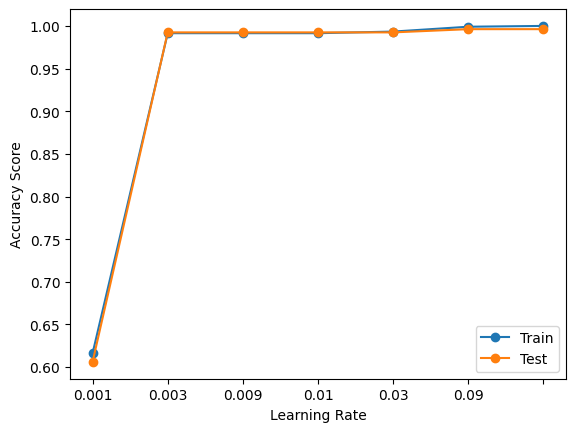

In [35]:
plt.plot(accuracy_train,marker='o')
plt.plot(accuracy_test,marker='o')
plt.xticks(ticks=range(len(Learning_rate)),labels=Learning_rate)
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy Score')
plt.legend(labels=['Train','Test'],loc='lower right')
plt.show()

In [36]:
model3=XGBClassifier()
model3.fit(X_train_scaled,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [37]:
accuracy3=accuracy_score(Y_test,model3.predict(X_test_scaled))

##### d) Neural Networks:

In [38]:
model4=Sequential([Dense(units=8,activation='relu'),Dense(units=4,activation='relu'),Dense(units=1,activation='sigmoid')])
model4.compile(optimizer=Adam(learning_rate=0.001),loss=BinaryCrossentropy())

In [39]:
model4.fit(X_train_scaled,Y_train,epochs=100)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7974
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7361 
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7134
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7027 
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6917 
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6916
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6826 
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6818 
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6762 
Epoch 10/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6713 
Epoch 11/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6734 
Epoch 12/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6635 
Epoch 13/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6647 
Epoch 14/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6654 
Epoch 15/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 

In [40]:
accuracy_list=[]
threshold=[i*0.1 for i in range(1,11)]
for t in threshold:
    p=model4.predict(X_test_scaled)
    p=np.array([1 if i>=t else 0 for i in p])
    accuracy_list.append(accuracy_score(Y_test,p))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step


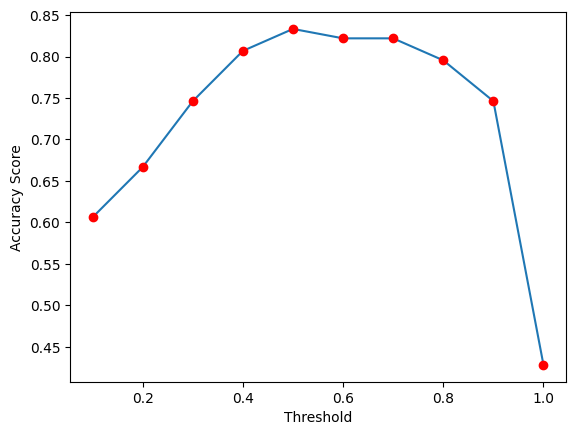

In [41]:
plt.plot(threshold,accuracy_list,marker='o',mec='r',mfc='r')
plt.xlabel('Threshold')
plt.ylabel('Accuracy Score')
plt.show()

In [42]:
p=model4.predict(X_test_scaled)
p=np.array([1 if i>=0.5 else 0 for i in p])
accuracy4=accuracy_score(Y_test,p)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


#### 5. Selecting the best suited model:

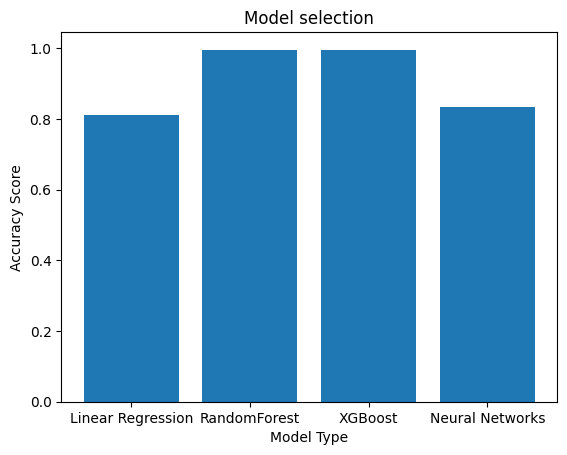

In [43]:
x=['Linear Regression','RandomForest','XGBoost','Neural Networks']
y=[accuracy1,accuracy2,accuracy3,accuracy4]
plt.bar(x,y)
plt.xlabel('Model Type')
plt.ylabel('Accuracy Score')
plt.title('Model selection')
plt.show()